# Importing Libraries

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading Dataset

In [2]:
# Creating Dataframe

df = pd.read_csv("CC GENERAL.csv")

# Information of the Dataframe - 1

In [3]:
# Columns in the Dataframe

df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
# Information of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Feature Engineering

In [5]:
# Dropping 'CUST_ID' Column

df = df.drop('CUST_ID', axis=1)

In [6]:
# Dropping Redundant columns

df = df.drop(columns=['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY','BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'])

In [7]:
# Replace Inf with Nan

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
# Null values in the Dataframe

df.isna().sum()

BALANCE                         0
CASH_ADVANCE                    0
PURCHASES_FREQUENCY             0
ONEOFF_PURCHASES_FREQUENCY      0
PURCHASES_TRX                   0
CREDIT_LIMIT                    1
PAYMENTS                        0
MINIMUM_PAYMENTS              313
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

In [9]:
# Checking the Percentage of Null Values

313/len(df) * 100

3.4972067039106145

In [10]:
# Replacing Null values with Median

df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].fillna(df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].median())


In [11]:
# Null values in the Dataframe

df.isna().sum()

BALANCE                       0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
PURCHASES_TRX                 0
CREDIT_LIMIT                  0
PAYMENTS                      0
MINIMUM_PAYMENTS              0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64

# Information of the Dataframe - 2

In [12]:
# Replace Inf with Nan

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
# Fill Null values with Median

df.fillna(df.median(), inplace=True)

In [14]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df.select_dtypes(include=['number'])


vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]


print(vif_data.sort_values(by="VIF", ascending=False))


                      Feature       VIF
5                CREDIT_LIMIT  4.410460
2         PURCHASES_FREQUENCY  4.392062
9                      TENURE  4.140091
0                     BALANCE  3.624188
4               PURCHASES_TRX  2.729047
3  ONEOFF_PURCHASES_FREQUENCY  2.394326
6                    PAYMENTS  2.357910
1                CASH_ADVANCE  2.123533
8            PRC_FULL_PAYMENT  1.686824
7            MINIMUM_PAYMENTS  1.387172


In [15]:
# Statistical Information about the Dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_TRX,8950.0,14.709832,24.857649,0.000000,1.000000,7.000000,17.000000,358.00000
CREDIT_LIMIT,8950.0,4494.282473,3638.646702,50.000000,1600.000000,3000.000000,6500.000000,30000.00000
PAYMENTS,8950.0,1733.143852,2895.063757,0.000000,383.276166,856.901546,1901.134317,50721.48336
MINIMUM_PAYMENTS,8950.0,844.906767,2332.792322,0.019163,170.857654,312.343947,788.713501,76406.20752
PRC_FULL_PAYMENT,8950.0,0.153715,0.292499,0.000000,0.000000,0.000000,0.142857,1.00000
TENURE,8950.0,11.517318,1.338331,6.000000,12.000000,12.000000,12.000000,12.00000


In [16]:
# Correlation between Columns

df.corr()

,BALANCE,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.496692,-0.077944,0.073166,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
CASH_ADVANCE,0.496692,1.000000,-0.215507,-0.086754,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,-0.215507,1.000000,0.501343,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,-0.086754,0.501343,1.000000,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_TRX,0.154338,-0.075850,0.568430,0.544869,1.000000,0.272902,0.370832,0.098722,0.162066,0.121874
CREDIT_LIMIT,0.531296,0.303997,0.119833,0.295059,0.272902,1.000000,0.421876,0.126765,0.055695,0.139222
PAYMENTS,0.322802,0.453238,0.103464,0.243537,0.370832,0.421876,1.000000,0.128960,0.112138,0.106136
MINIMUM_PAYMENTS,0.397920,0.140747,0.006154,-0.027311,0.098722,0.126765,0.128960,1.000000,-0.135194,0.060006
PRC_FULL_PAYMENT,-0.318959,-0.152935,0.305802,0.157531,0.162066,0.055695,0.112138,-0.135194,1.000000,-0.016486
TENURE,0.072692,-0.068312,0.061506,0.082466,0.121874,0.139222,0.106136,0.060006,-0.016486,1.000000


# Explanatory Data Analysis

## Univariate Analysis

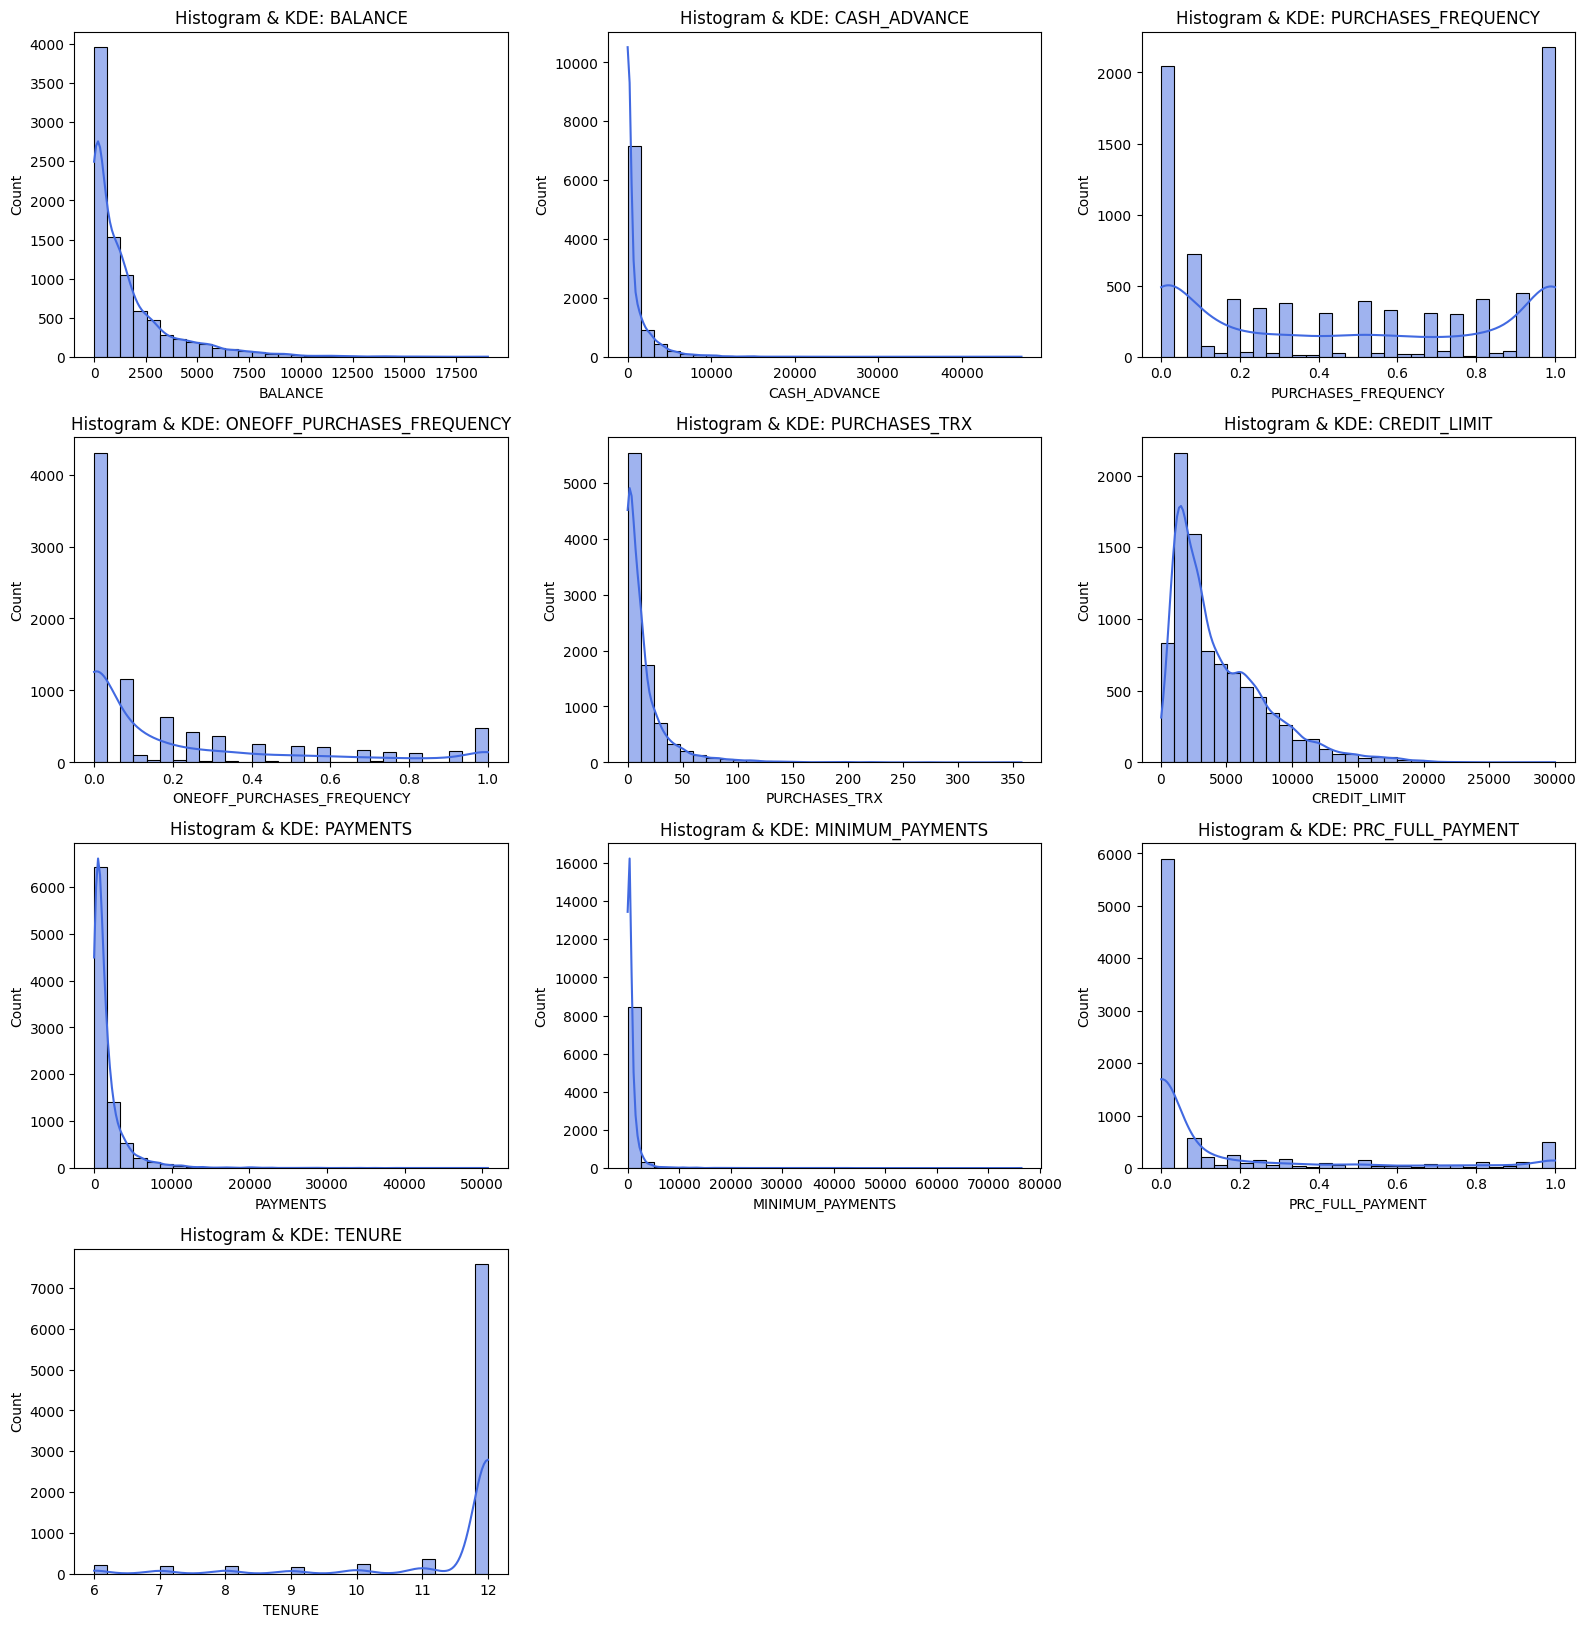

In [17]:
# Plot histograms and KDE for each feature

plt.figure(figsize=(16, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Histogram & KDE: {col}")

plt.tight_layout()
plt.show()

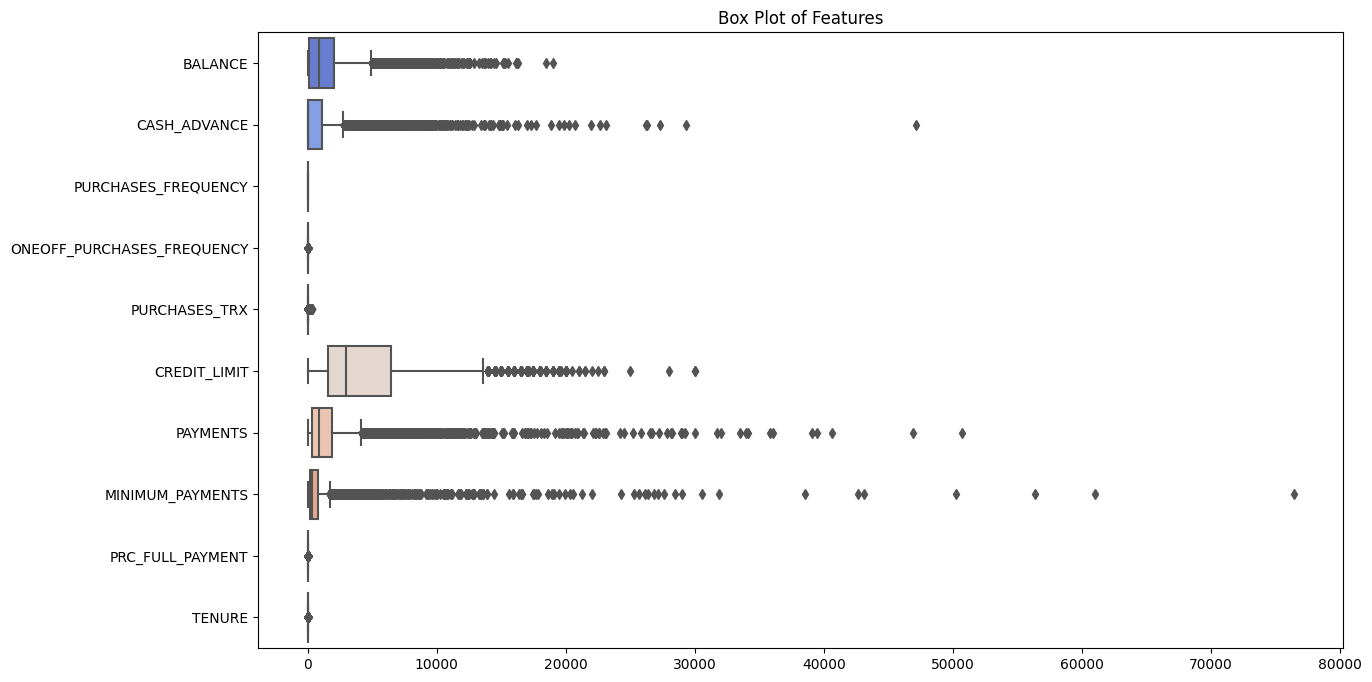

In [18]:
# Plot Boxplot for each feature

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df.columns], orient="h", palette="coolwarm")
plt.title("Box Plot of Features")
plt.show()

## Bivariate Analysis

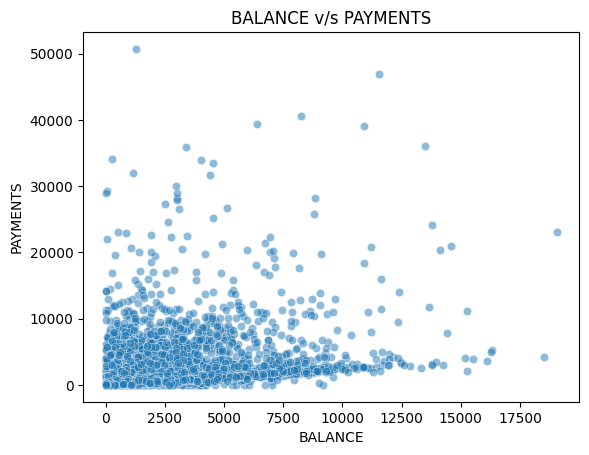

In [19]:
# Scatterplot - 'BALANCE v/s PAYMENTS'

sns.scatterplot(x=df['BALANCE'], y=df['PAYMENTS'], alpha=0.5)
plt.title('BALANCE v/s PAYMENTS')
plt.show()

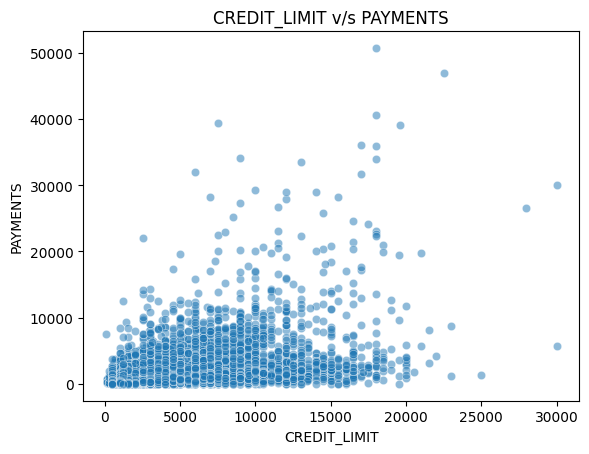

In [20]:
# Scatterplot - 'CREDIT_LIMIT v/s PAYMENTS'

sns.scatterplot(x=df['CREDIT_LIMIT'], y=df['PAYMENTS'], alpha=0.5)
plt.title('CREDIT_LIMIT v/s PAYMENTS')
plt.show()

## Multi-Variate Analysis

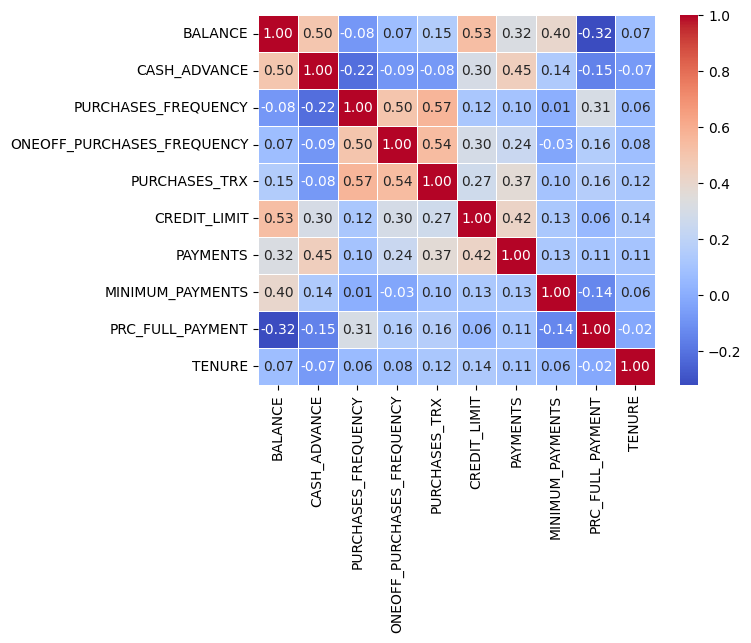

In [21]:
# Heatmap of Correlation

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5);

# Model Building

## KMeans

In [22]:
# RobustScaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# KMeans Silhouette Scores

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores_kmeans = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels_kmeans = kmeans.fit_predict(df_scaled)
    
    silhouette_scores_kmeans[k] = silhouette_score(df_scaled, labels_kmeans)

In [ ]:
# Print KMeans Silhouette Scores

for k, score in silhouette_scores_kmeans.items():
    print(f"Silhouette Score for {k} clusters: {score}")

In [ ]:
# Choose the best K based on highest KMeans silhouette score

best_k = max(silhouette_scores_kmeans, key=silhouette_scores_kmeans.get)
print(f"Best Number of Clusters: {best_k}")

In [ ]:
# Visualization KMeans Model with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df_pca_clustered = kmeans_pca.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_pca_clustered, palette="viridis", s=100)

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title(f"K-Means Clustering with PCA (k={best_k})")
plt.legend()
plt.show()

In [ ]:
# Installing Umap

!pip install umap-learn

In [ ]:
# Visualization KMeans Model with Umap

import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
df_umap = umap_reducer.fit_transform(df_scaled)

kmeans_umap = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df_umap_clustered = kmeans_umap.fit_predict(df_umap)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_umap[:, 0], y=df_umap[:, 1], hue=df_umap_clustered, palette="viridis", s=100)

plt.xlabel("UMAP Feature 1")
plt.ylabel("UMAP Feature 2")
plt.title(f"K-Means Clustering with UMAP (k={best_k})")
plt.legend(title="Clusters")
plt.show()

# Conlcusion

## Identifying Customer Segments

In [ ]:
df["Cluster"] = kmeans.labels_

In [ ]:
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

***The optimal number of clusters determined using K-Means is **6**, based on the highest silhouette score of **0.4016**. This segmentation helps in identifying distinct customer groups for better targeting and decision-making. High Spenders (Clusters 4 & 8), Moderate Spenders (Clusters 2, 3, 6) and Low Spenders (Clusters 0, 1, 5, 7, 9)***